In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: -0.04932282554800438, 4: 0.439449484196885, 5: 2, 6: -0.11904329075891307, 7: 0.35447618642785106, 8: 0.44489171562539864, 9: -0.4123621666598376, 10: 0.0450866823921906, 11: 0.30891746459449076, 12: -0.27509599270544816, 13: 0.41094191073801223, 14: 0.4792837253851092, 15: -0.2907226235352367, 16: -0.2194717008443563, 17: 0.2526705289170128, 18: 0.4410746187942606, 19: 0.08400075702019683, 20: 0.10644909680210202}


D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


1:	 [x = 9.648,], [y = -3.356,], [z = -8.785,], [A = 702.119,], [bg = 24.805,],
114:	 [x = -9.100,], [y = -3.293,], [z = -6.746,], [A = 1799.970,], [bg = 39.770,],
47:	 [x = -0.478,], [y = -0.533,], [z = 3.579,], [A = 879.146,], [bg = 6.875,],
119:	 [x = 1.178,], [y = -5.297,], [z = 8.089,], [A = 723.289,], [bg = 90.506,],
71:	 [x = -7.409,], [y = -3.458,], [z = -2.201,], [A = 1441.143,], [bg = 73.619,],
26:	 [x = 7.550,], [y = -5.702,], [z = -7.164,], [A = 953.925,], [bg = 85.192,],
93:	 [x = 2.746,], [y = -1.234,], [z = -4.518,], [A = 1393.993,], [bg = 40.812,],
96:	 [x = 2.957,], [y = -5.628,], [z = 4.417,], [A = 658.200,], [bg = 50.427,],
80:	 [x = 7.178,], [y = 9.101,], [z = -1.314,], [A = 676.648,], [bg = 89.790,],
101:	 [x = 0.638,], [y = 3.732,], [z = -0.817,], [A = 1844.553,], [bg = 1.268,],
96:	 [x = -0.944,], [y = -2.371,], [z = -2.913,], [A = 1917.474,], [bg = 81.459,],
121:	 [x = -2.608,], [y = -3.192,], [z = 8.822,], [A = 1302.060,], [bg = 68.865,],
125:	 [x = -5.544,], [

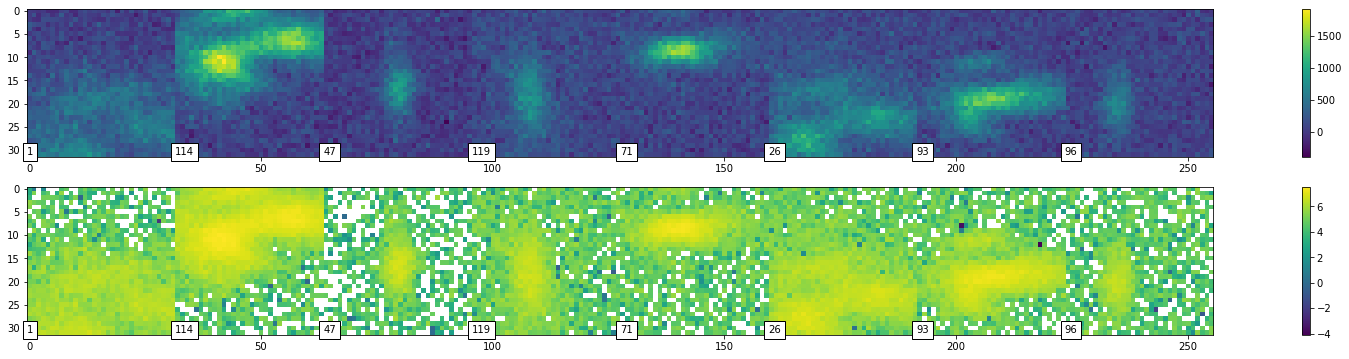

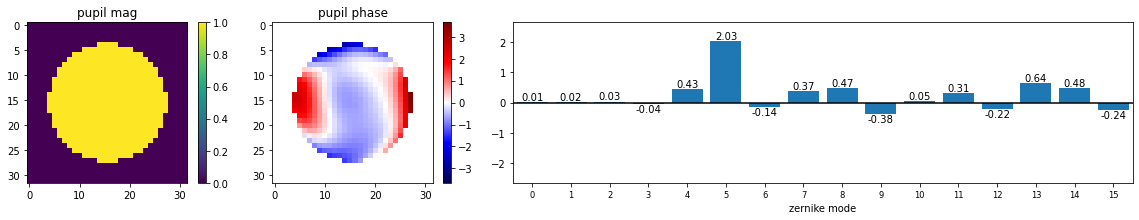

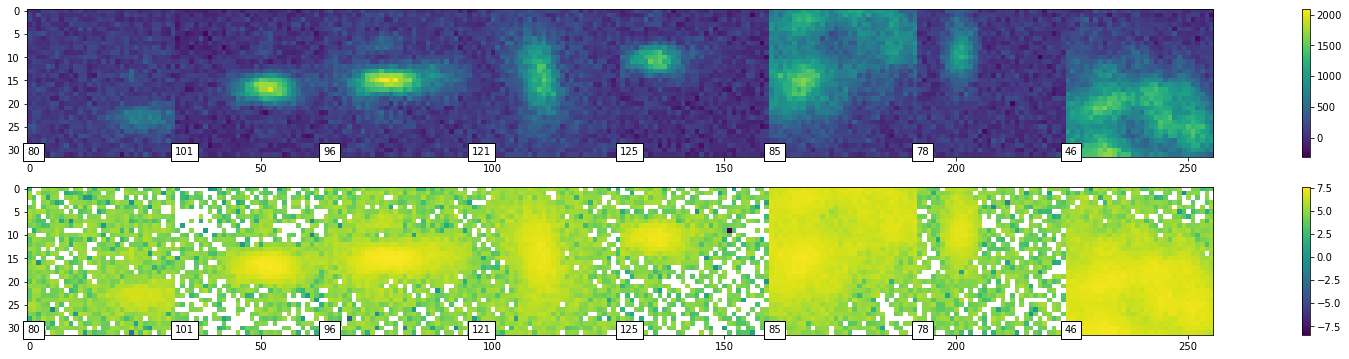

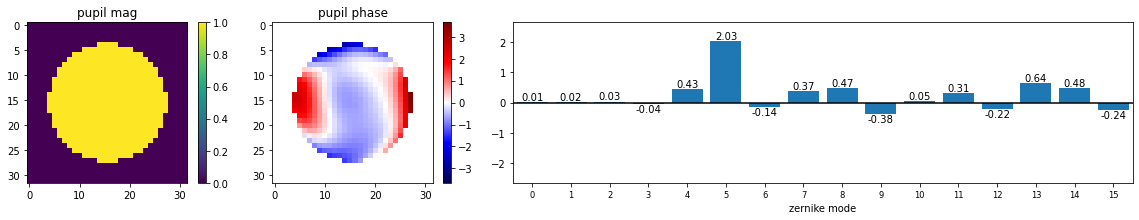

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    'padding': (4,4),
    'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-08_19-30-20_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 156184.562500
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 117093.593750
****************************************************************************************************
Validation, average loss = 115857.281250
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-08_19-30-20_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'en

D:\Github\smlm-dl\smlm_dl\model.py:648: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


D:\Pytorch\runs\2021-12-08_19-30-20_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2021-12-08_19-30-20_DESKTOP-7NNT713\model.ptm, last modified: Wed Dec  8 19:30:20 2021
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─Gaussian2DRenderer: 1-1                --
├─EncoderModel: 1-2                      --
│    └─ModuleDict: 2-1                   --
│    │    └─Sequential: 3-1              2,514
│    │    └─Sequential: 3-2              13,984
│    │    └─Sequential: 3-3              55,616
│    └─ModuleDict: 2-2                   --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDict: 2-4                   --
│    │    └─Conv2d: 3-6                  325
Total params: 

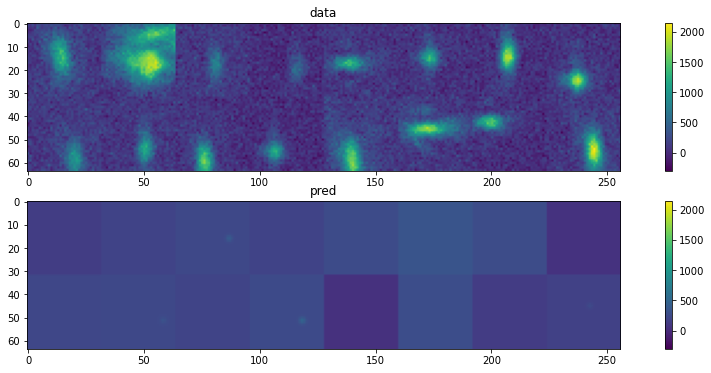

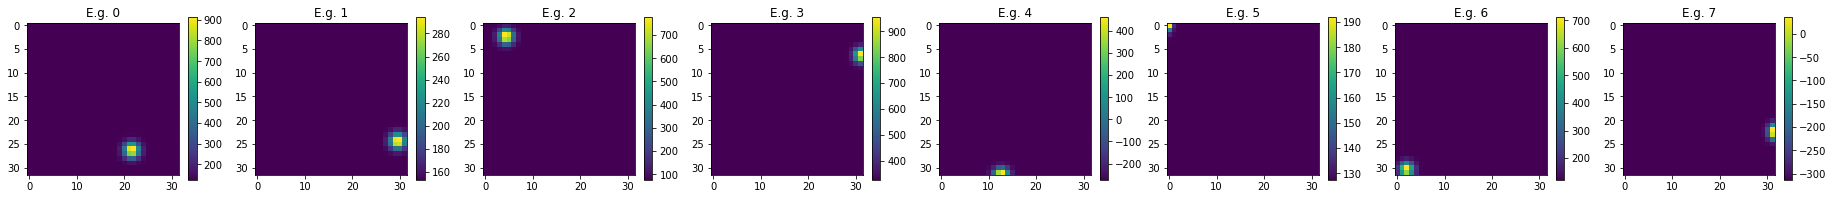

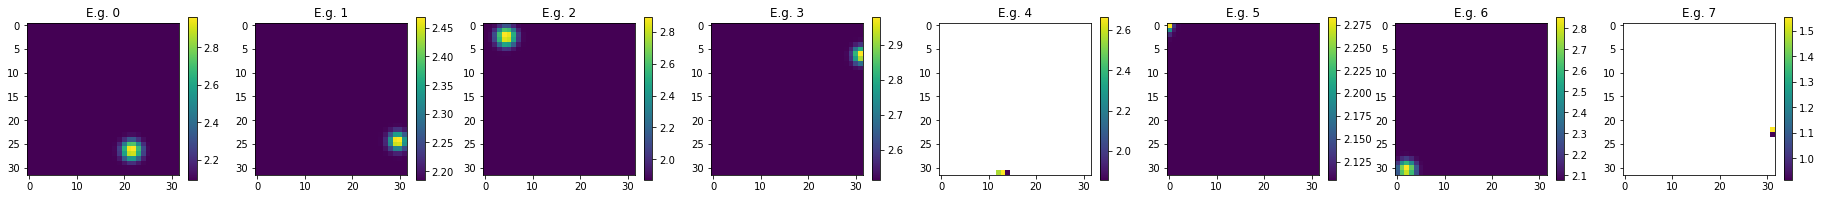

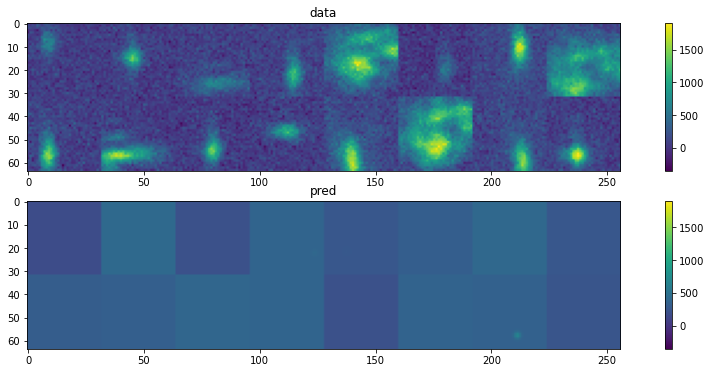

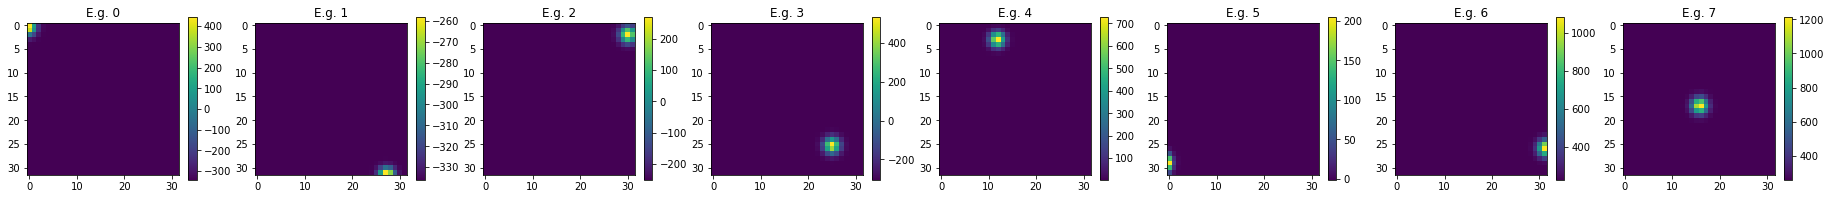

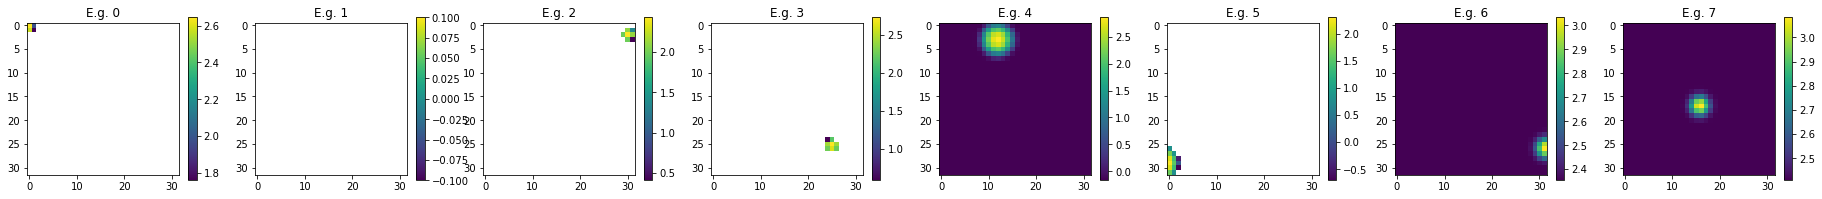

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-08_19-30-30_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Epoch # 0, Batch # 1 (128/128), loss = 150124.281250
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 154679.453125
****************************************************************************************************
Validation, average loss = 138824.296875
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-08_19-30-30_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoder

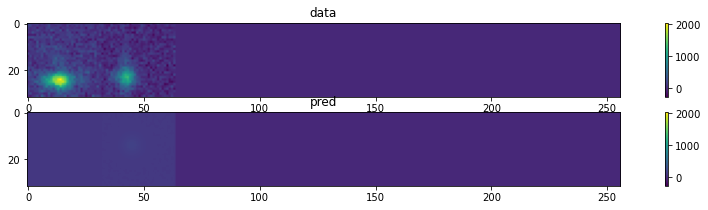

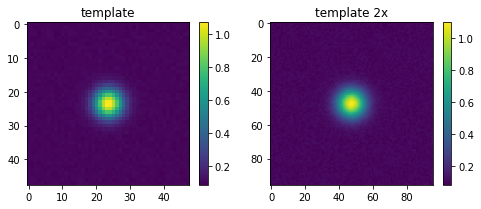

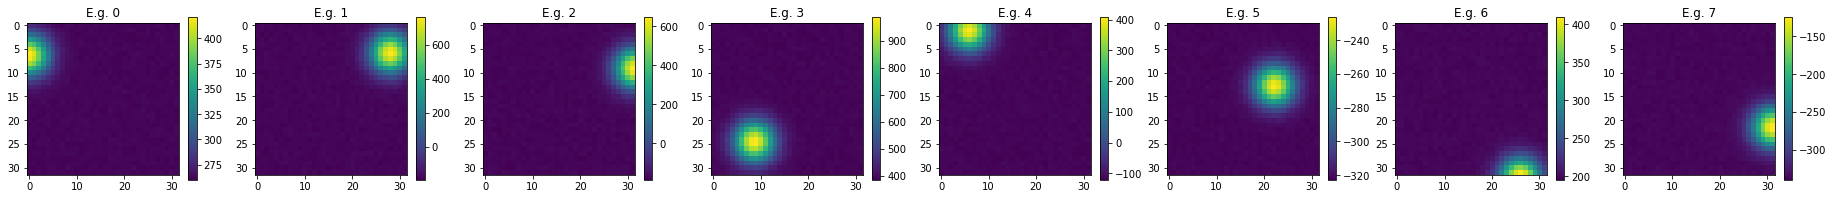

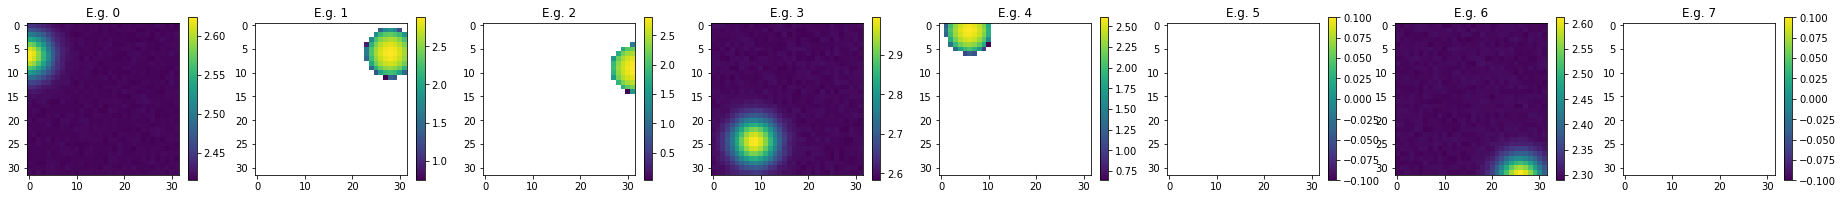

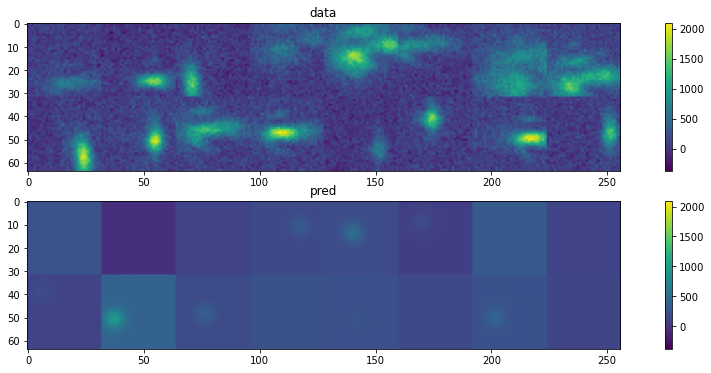

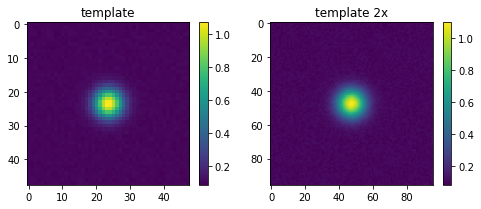

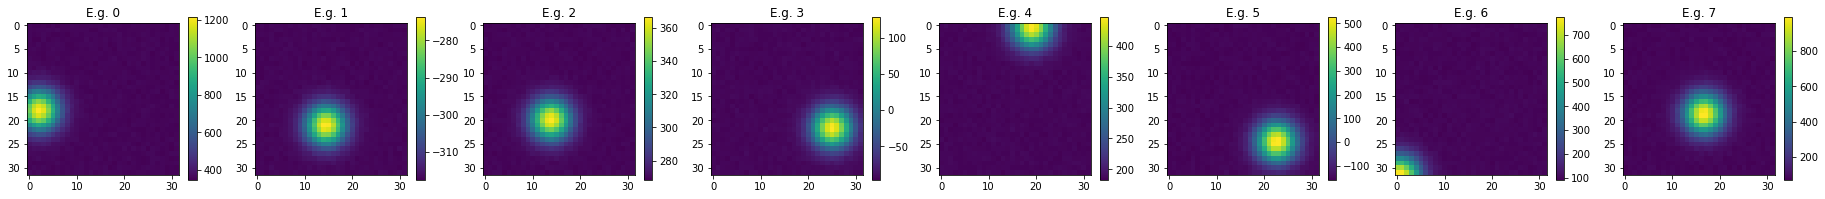

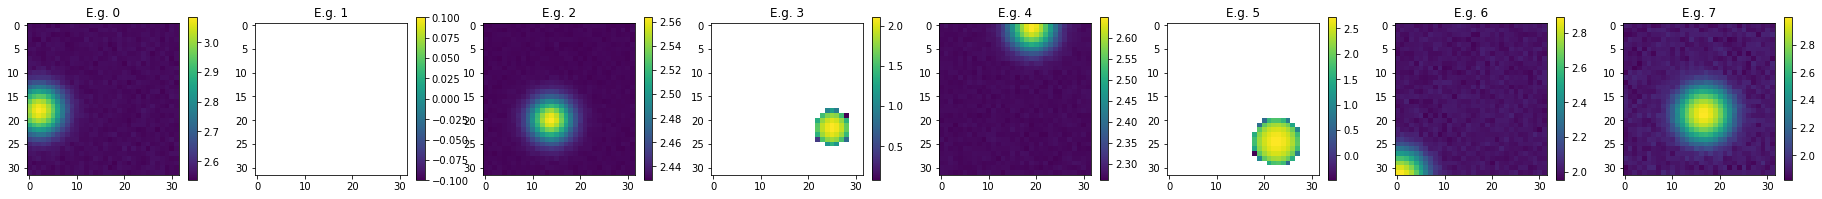

In [4]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      renderer_params={"template_padding":(8,8)},
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-08_19-30-43_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 174133.843750
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 125472.765625
****************************************************************************************************
Validation, average loss = 160138.468750
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-08_19-30-43_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder

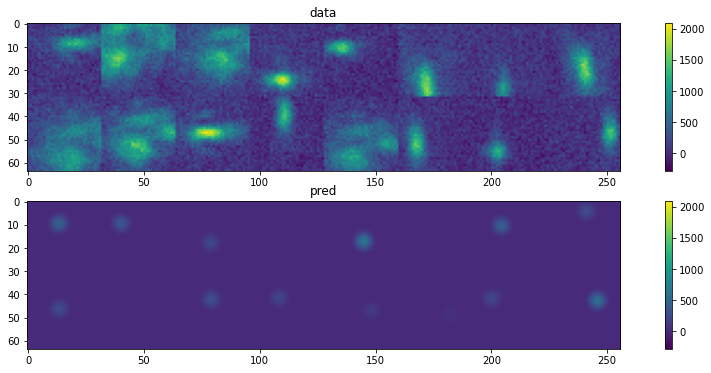

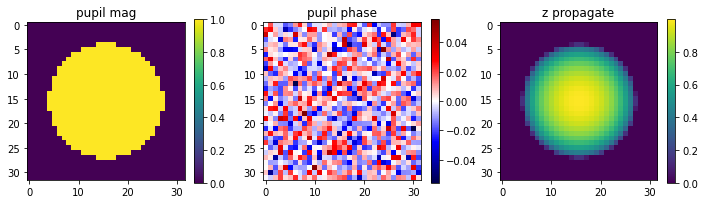

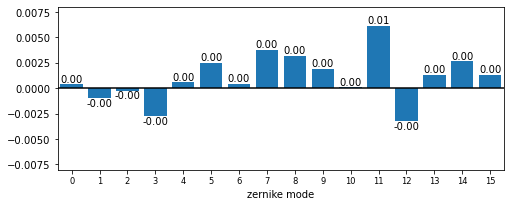

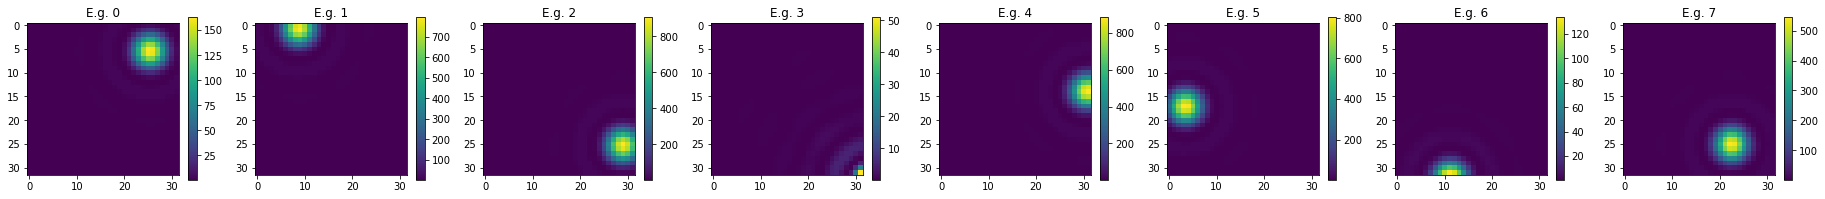

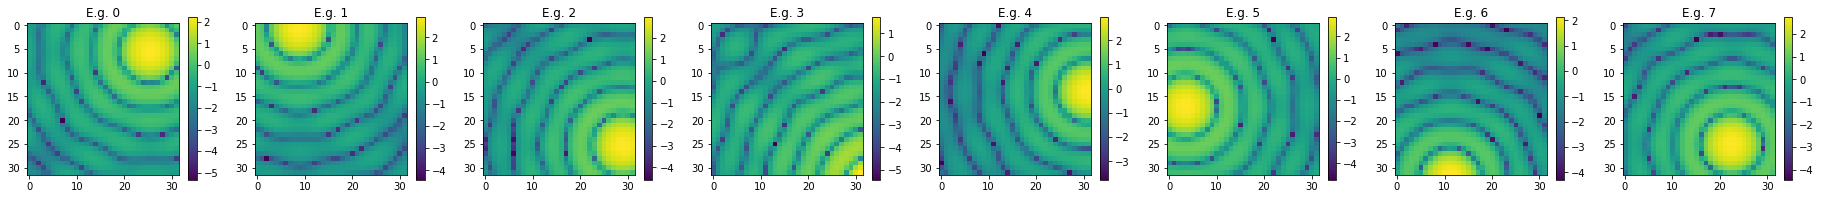

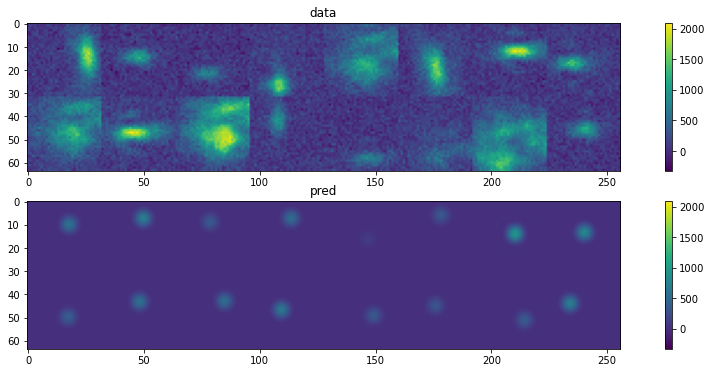

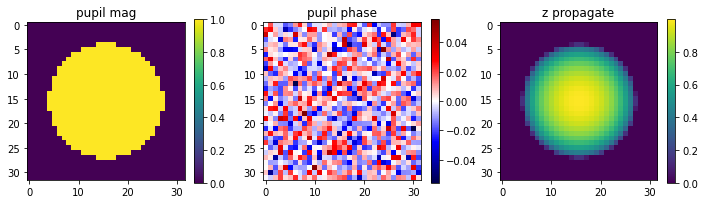

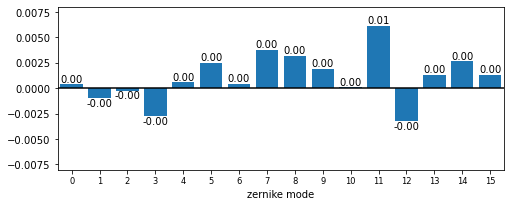

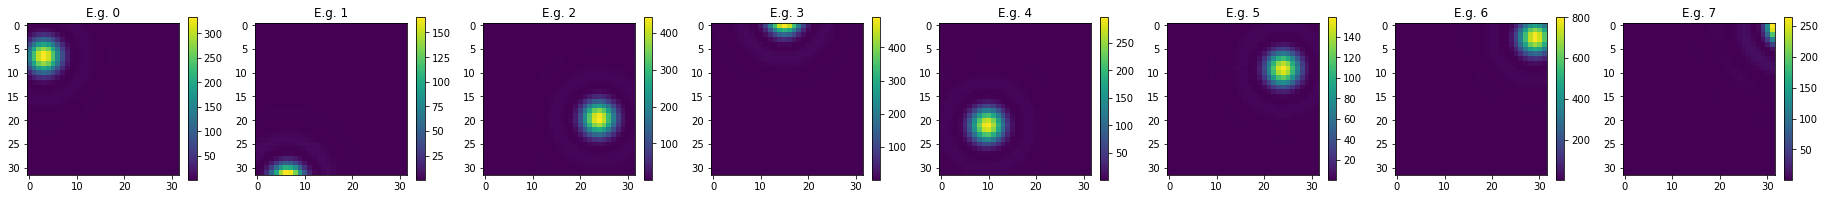

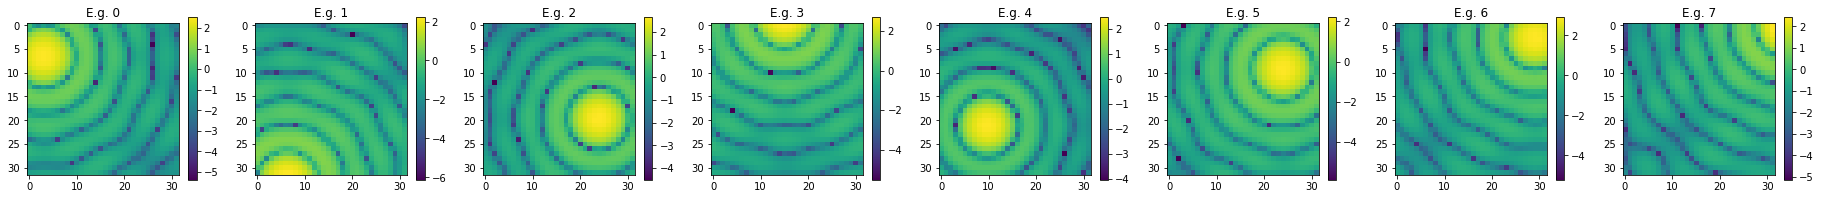

In [5]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )